11/12/2021 Fathan Baihaqy

# GET TRYNING DATA

Select the Best Model for Dataset. *Note installing lazypredict require restarting your runtime

### Install and Load Modules

In [ ]:
#lazypredict (to Predict Best Model)
! pip install lazypredict

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

import lazypredict
from lazypredict.Supervised import LazyRegressor

from numpy.random import seed
from numpy.random import randn

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


### Load Data

In [ ]:
organism = "Mycobacterium tuberculosis"
target   = "CHEMBL1849"

fileName = f"02 fgrData {target} {organism}.csv"
fgrData = pd.read_csv(fileName)

realVal = [   float(x) for x in list(fgrData["pIC50"])   ]
tryData = fgrData.drop("pIC50", axis=1)


### Function

In [ ]:
def reduceData(data, threshold=0):
  selection = VarianceThreshold(threshold=threshold)
  selection.fit_transform(data)
  final = data[data.columns[selection.get_support(indices=True)]]
  return final

In [ ]:
def splitData(dataX, dataY, split=0.33, seedVal=1):
  trX, tsX, trY, tsY = train_test_split(dataX, dataY, test_size=split, random_state=seedVal)
  return trX, tsX, trY, tsY

In [ ]:
def testData(data, realVal, threshold=0, split=0.33, seedVal=1):
  #Reduce Data
  data = reduceData(data, threshold)
  #Split Data
  trX, tsX, trY, tsY = splitData(data, realVal, split, seedVal)

  testSet = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
  trModel, trResult = testSet.fit(trX, tsX, trY, tsY)


  return trResult

In [ ]:
def testCombo(data, realVal, threshold=0, split=0.33, seedVal=1, repeat=2):
  #Reduce Data
  data = reduceData(data, threshold)

  # First Run
  trX, tsX, trY, tsY = splitData(data, realVal, split, seedVal=1)
  testSet = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
  trModel, trResult = testSet.fit(trX, tsX, trY, tsY)
  summ = pd.DataFrame(index=trResult.index)
  summ['R-Squared']   = trResult['R-Squared']
  summ['Time Taken']  = trResult['Time Taken']

  # Seterusnya
  for seed in range(2,repeat+1):
    trX, tsX, trY, tsY = splitData(data, realVal, split, seedVal=seed)
    testSet = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
    trModel, trResult = testSet.fit(trX, tsX, trY, tsY)
    for x in summ.index:
      summ.loc[x, 'R-Squared']  += trResult['R-Squared'][x]
      summ.loc[x, "Time Taken"] += trResult['Time Taken'][x]
  
  # Dibagi dengan repeat
  for idx in summ.index:
    summ.loc[idx,"R-Squared"] = summ.loc[idx,"R-Squared"]/repeat
    summ.loc[idx,"Time Taken"] = summ.loc[idx,"Time Taken"]/repeat
  summ = summ.sort_values("Time Taken", ascending=False)
  summ = summ.sort_values("R-Squared", ascending=False)

  #Visualisasi
  new = list(summ.index)
  for x in range(len(summ.index)):
    val = summ['R-Squared'][x]
    val = val.round(2)
    val = str(val).ljust(4, "0")
    new[x] += f" {val}"

  plt.figure(figsize=(5, 10))
  sns.set_theme(style="whitegrid")
  ax = sns.barplot(y=new, x="R-Squared", data=summ)
  ax.set(xlim=(0, 1))


  return summ


### Deskripsi Potensi Model

100%|██████████| 42/42 [00:49<00:00,  1.19s/it]


,R-Squared,Time Taken
Model,,
LGBMRegressor,0.60,0.11
HistGradientBoostingRegressor,0.60,1.78
RandomForestRegressor,0.58,0.99
BayesianRidge,0.58,0.24
TweedieRegressor,0.58,0.06
GeneralizedLinearRegressor,0.58,0.08
GradientBoostingRegressor,0.57,0.37
GammaRegressor,0.57,0.05
NuSVR,0.57,0.11


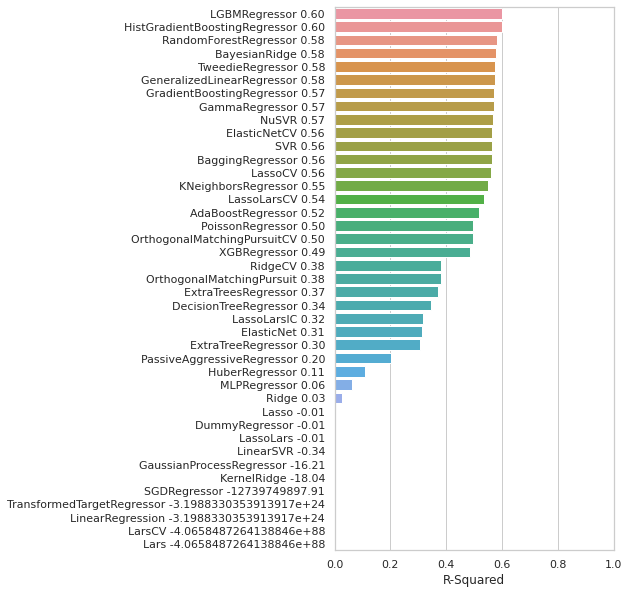

In [103]:
a = testCombo(tryData, realVal, threshold=0, split=0.2, seedVal=1, repeat=20)
a.to_csv("testingForModel.csv")
a.head(10)

In [104]:
a

,R-Squared,Time Taken
Model,,
LGBMRegressor,0.60,0.11
HistGradientBoostingRegressor,0.60,1.78
RandomForestRegressor,0.58,0.99
BayesianRidge,0.58,0.24
TweedieRegressor,0.58,0.06
GeneralizedLinearRegressor,0.58,0.08
GradientBoostingRegressor,0.57,0.37
GammaRegressor,0.57,0.05
NuSVR,0.57,0.11


### Model yang Dipili

In [105]:
import lightgbm

threshold = 0
#Reduce Data
data = reduceData(tryData, threshold)

# Propetie of tryning data
tesCol = data.columns
oriCom = pd.read_csv("01 comData CHEMBL1849 Mycobacterium tuberculosis.csv").canonical_smiles

# Creating new model
model = lightgbm.sklearn.LGBMRegressor()
model = model.fit(data, realVal)
result = model.predict(data)



Model             : LGBMRegressor
threshold_var     : 0
mean_squared_error: 0.2641
R_square          : 0.8505


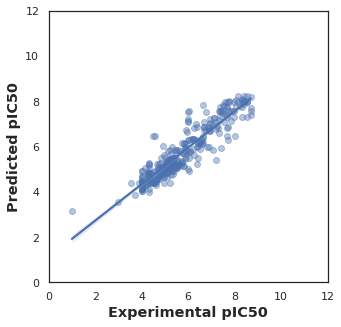

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error = mean_squared_error(realVal, result)
R_square           = r2_score(realVal, result)

out = f"""
Model             : LGBMRegressor
threshold_var     : {threshold}
mean_squared_error: {mean_squared_error.round(4)}
R_square          : {R_square.round(4)}"""

print(out)

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(realVal, result, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()



In [ ]:
#Average
n = len(realVal)
delta = [0 for x in range(n)]
total = 0
for x in range(n):
  delta[x] = result[x] - realVal[x]
  total+=delta[x]
average = total/n

#calculate Stdv
total = 0
for x in range(n):
  total+= (average-delta[x])**2
stdv = ( total/(n-1) )**0.5

print(stdv)

0.5146874437091999


In [ ]:
import pickle

# Save model as bytes file
a = {
      "tesCol":tesCol,
      "model":model,
      "oriCom":oriCom,
}
with open("modelSet_yay.tan","wb") as file:
  pickle.dump(a,file)